In [27]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
comp='shannon'
import sys  # update paths
sys.path.append('../../')

sys.path.append('../')

import numpy as np 
import matplotlib.pyplot as plt

import scresonators.fit_resonator.ana_tls as ana_tls
import scresonators.measurement.handy as hy
import seaborn as sns

colors = ["#454c7c", '#b51d14', '#ddb310','#658b38','#7e1e9c', '#75bbfd', '#cacaca']
sns.set_palette(colors)
#G:\Shared drives\SLab\JJ_fab\Coherence Sample\022125_Resonator\data

if comp=='shannon':
    pth_base ='/Users/sph/Library/CloudStorage/GoogleDrive-circuitqed@gmail.com/'
elif comp=='bf1':
    pth_base='G:/'

folder = 'My Drive/Projects/Materials/'
#folder = 'Shared drives/SLab/JJ_fab/Coherence Sample/'
pth = os.path.join(pth_base,folder)
img_pth = os.path.join(pth,'Outputs/Resonators/')
meas = 'siliconta7_res1'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
cfg, data_pth, folder, img_name, ind = hy.get_params('mini.yml', meas, pth=pth)
#data_pth = os.path.join(data_pth, folder)

In [32]:
data_pth

'/Users/sph/Library/CloudStorage/GoogleDrive-circuitqed@gmail.com/My Drive/Projects/Materials/Data/250602-ResSil7Ta_BFG/'

-54.020009904539855
-55.642463744984234
-57.40606893634474
-59.13166853102546
-60.23500551977927
-60.0248799955168
-62.089968747321336


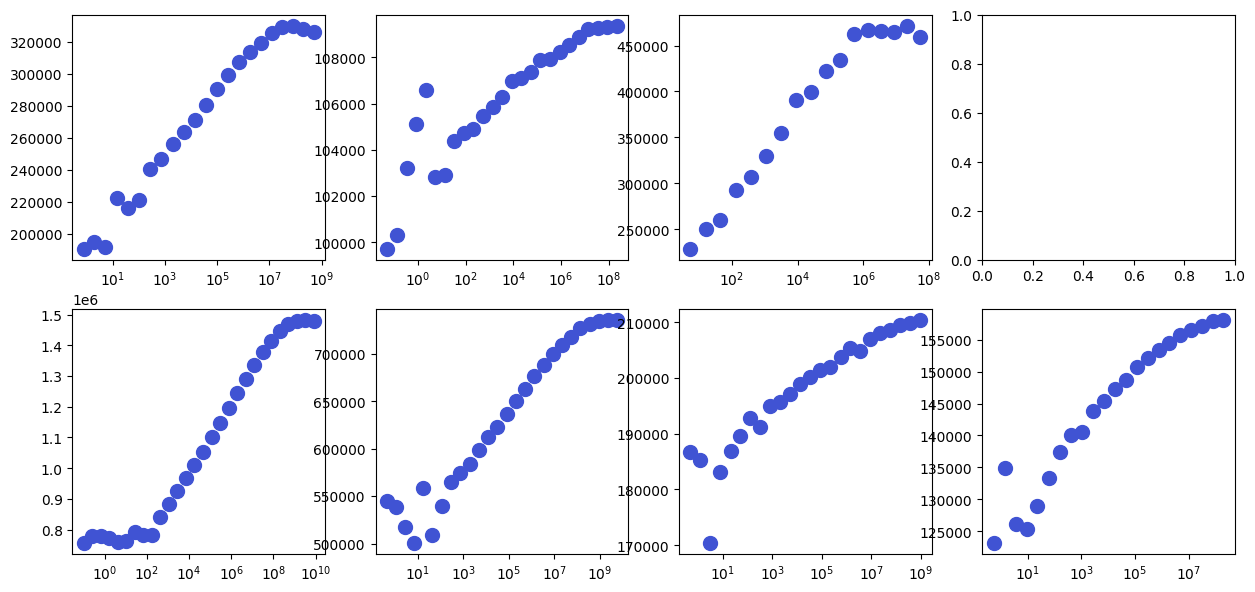

In [58]:
import pandas as pd
fig, ax = plt.subplots(2,4, figsize=(15, 7))
ax = ax.flatten()
df_full = pd.DataFrame()
ord = [4, 5, 6, 0, 7, 1, 2, 3, 4]
#ord = [3, 4, 5, 6, 0, 1, 7, 2]

    #print(csv_files_in_dir)

csv_files_in_dir = [f for f in os.listdir(os.path.join(data_pth, cfg['dir'][0])) if f.endswith('.csv') and f.startswith('fit_results')]
csv_files_in_dir.sort()

for i, csv_file in enumerate(csv_files_in_dir):
    for j in range(len(cfg['dir'])):
    
        file_path = os.path.join(data_pth, cfg['dir'][j], csv_file)
        df = pd.read_csv(file_path)

        df['pitch']=cfg['pitch'][i]
        df['target_freq']=cfg['target_freq'][i]
        df['resonator_id'] = i
        df['temp']=0.04

        if j==0: 
            max_pow = df['power_at_device_dBm'].max()
            df_copy = df.copy(deep=True)
            print(max_pow)
            #print(df_copy)
            #print(df_copy)
        else: 
            #print(df_copy)
            df_filtered = df[df['power_at_device_dBm'] > max_pow]
            df_combined = pd.concat([df_copy, df_filtered], ignore_index=True)            
            df_full = pd.concat([df_full, df_combined], ignore_index=True)
            #print(df_combined)

        #df_full = pd.concat([df_full, df], ignore_index=True)
        
        ax[ord[i]].semilogx(df['photon_number'], df['q_internal'],'o')


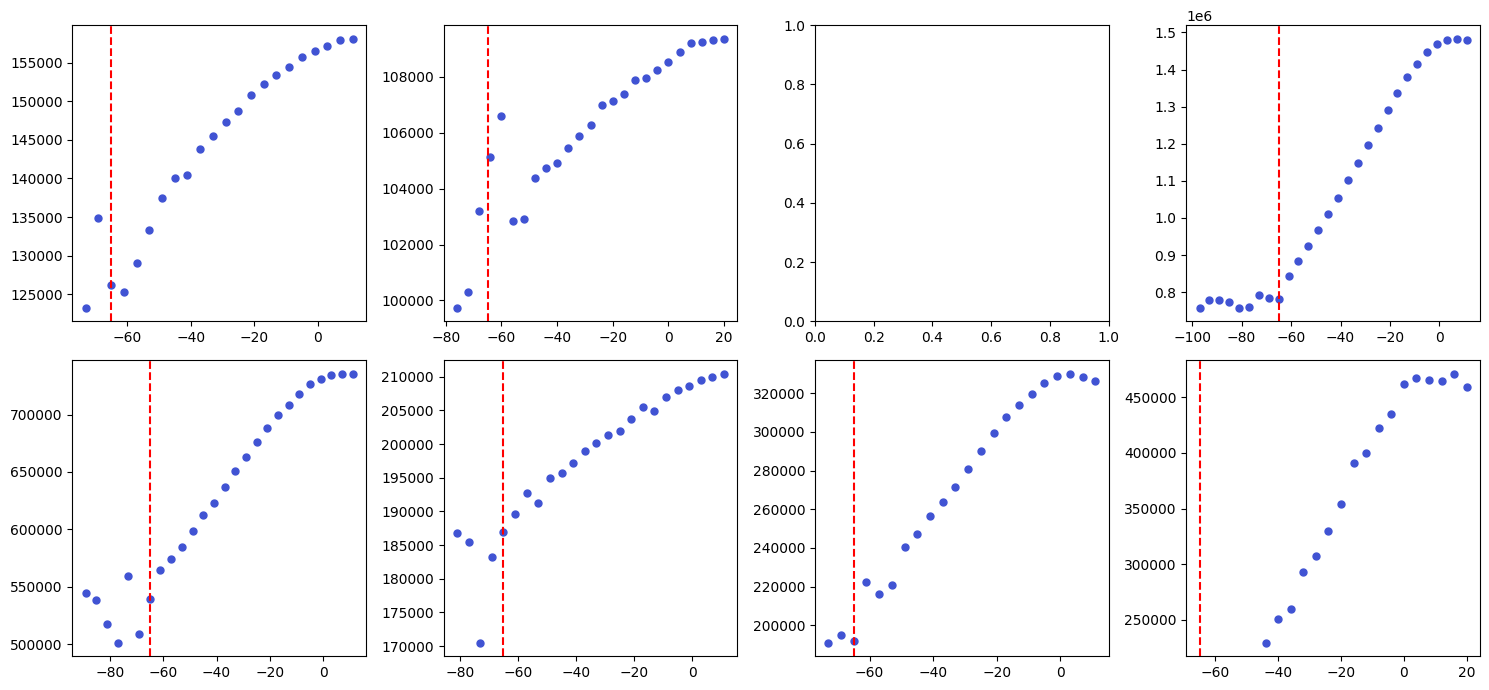

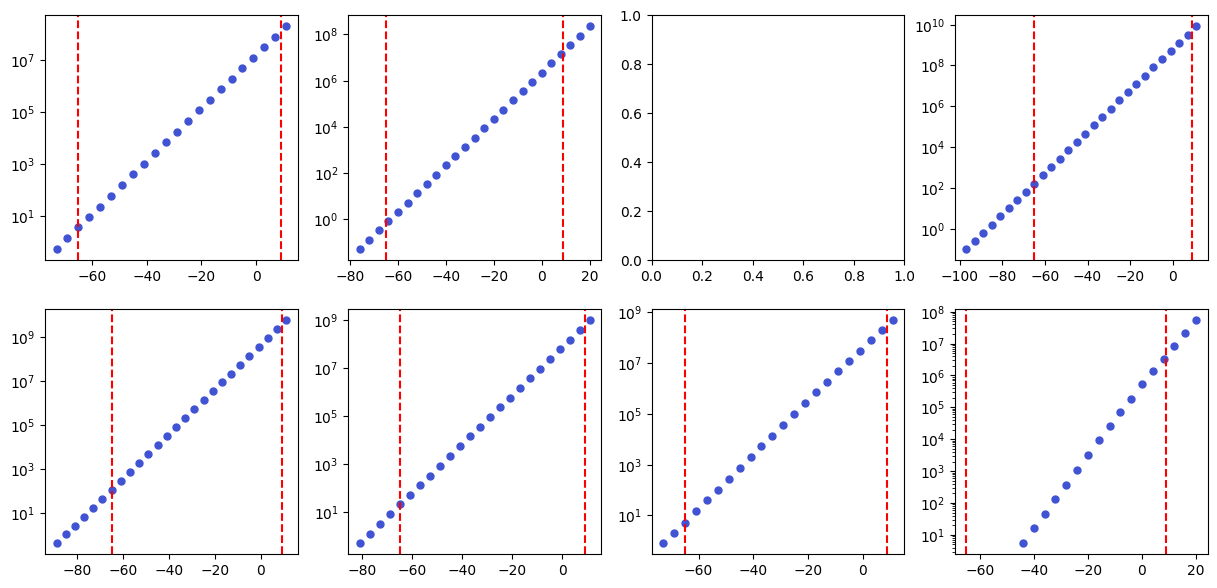

In [60]:
import pandas as pd
fig, ax = plt.subplots(2,4, figsize=(15, 7))
ax = ax.flatten()
df_full = pd.DataFrame()
#ord = [4, 5, 6, 0, 7, 1, 2, 3, 4]
ord = [3, 4, 5, 6, 0, 1,7, 2]


fig2, ax2 = plt.subplots(2,4, figsize=(15, 7))
ax2 = ax2.flatten()


full_path = os.path.join(data_pth, cfg['dir'][0])
csv_files_in_dir = [f for f in os.listdir(full_path) if f.endswith('.csv')]
csv_files_in_dir.sort()
    #print(csv_files_in_dir)
for i, csv_file in enumerate(csv_files_in_dir):
    file_path = os.path.join(full_path, csv_file)
    df = pd.read_csv(file_path)

    df['pitch']=cfg['pitch'][i]
    df['target_freq']=cfg['target_freq'][i]
    df['resonator_id'] = i
    df['temp']=0.04
    df_full = pd.concat([df_full, df], ignore_index=True)
    xval = df['photon_number']
    xval = df['power_dBm']
    ax[ord[i]].plot(xval, df['q_internal'],'.')
    ax2[ord[i]].semilogy(df['power_dBm'],df['photon_number'],'.')
    ax[ord[i]].axvline(x=-65, color='r', linestyle='--')
    ax2[ord[i]].axvline(x=-65, color='r', linestyle='--')
    ax2[ord[i]].axvline(x=9, color='r', linestyle='--')
fig.tight_layout()

In [61]:
df_full = df_full.sort_values(by='pitch')


In [73]:
subset

,power_idx,power_dBm,power_at_device_dBm,frequency_amp_Hz,q_total_amp,q_internal_amp,q_coupling_amp,kappa_Hz,photon_number,averages,...,frequency_Hz,q_internal_err,q_total_err,q_coupling_err,frequency_err,phase_err,pitch,target_freq,resonator_id,temp
163,16,-44,-126.089936,8.017987e+09,229525.157516,232560.921158,1.758325e+07,34932.934523,5.508473e+00,3290,...,8.017987e+09,9946.215199,9568.546254,703521.635797,546.098201,0.038093,3,8.033,6,0.04
162,15,-40,-122.089935,8.017987e+09,254039.076771,257763.185378,1.758325e+07,31562.021890,1.695009e+01,1387,...,8.017987e+09,6573.935343,6306.218005,418960.016509,303.764769,0.022987,3,8.033,6,0.04
147,0,20,-62.089969,8.017994e+09,451687.800183,463544.556414,1.765891e+07,17751.185102,5.335542e+07,100,...,8.017994e+09,7505.403715,6960.225983,253359.938383,105.161304,0.014334,3,8.033,6,0.04
148,1,16,-66.089969,8.017994e+09,456892.081515,468846.841343,1.791859e+07,17548.988442,2.141851e+07,100,...,8.017994e+09,6939.644753,6436.616117,234534.590974,93.229089,0.012976,3,8.033,6,0.04
149,2,12,-70.089969,8.017994e+09,454767.293392,466724.132799,1.775142e+07,17630.981834,8.527291e+06,100,...,8.017994e+09,6883.911783,6382.425007,231834.832936,94.286908,0.012957,3,8.033,6,0.04
151,4,4,-78.089962,8.017992e+09,452236.086392,464109.428819,1.767716e+07,17729.660942,1.342098e+06,100,...,8.017992e+09,9016.354790,8359.787418,303428.891214,122.146112,0.016798,3,8.033,6,0.04
152,5,0,-82.089958,8.017992e+09,447372.551776,459030.655629,1.761502e+07,17922.403991,5.247140e+05,100,...,8.017991e+09,8931.083213,8291.589114,304834.693854,162.851991,0.016667,3,8.033,6,0.04
153,6,-4,-86.089954,8.017991e+09,420375.344236,430937.610956,1.715120e+07,19073.408941,1.894295e+05,100,...,8.017991e+09,6852.758282,6379.517539,244676.018939,141.529082,0.013746,3,8.033,6,0.04
150,3,8,-74.089967,8.017993e+09,452755.928630,464670.506426,1.765756e+07,17709.306197,3.382702e+06,100,...,8.017993e+09,7417.403490,6874.770813,249770.805833,102.106299,0.014110,3,8.033,6,0.04
155,8,-12,-94.089945,8.017989e+09,392596.978669,401563.037958,1.758325e+07,20422.951531,2.554250e+04,100,...,8.017989e+09,8155.694676,7635.052419,314921.643038,148.038094,0.017508,3,8.033,6,0.04


5.508473074023363
4.964616769366768
3.6994344276396314
166.90003403663962
111.61109776961383
20.880911858122968
0.8310242060785954


/var/folders/00/4dhzg6ms0xl3w8qywb_l4_nw0000gn/T/ipykernel_41252/1285570960.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


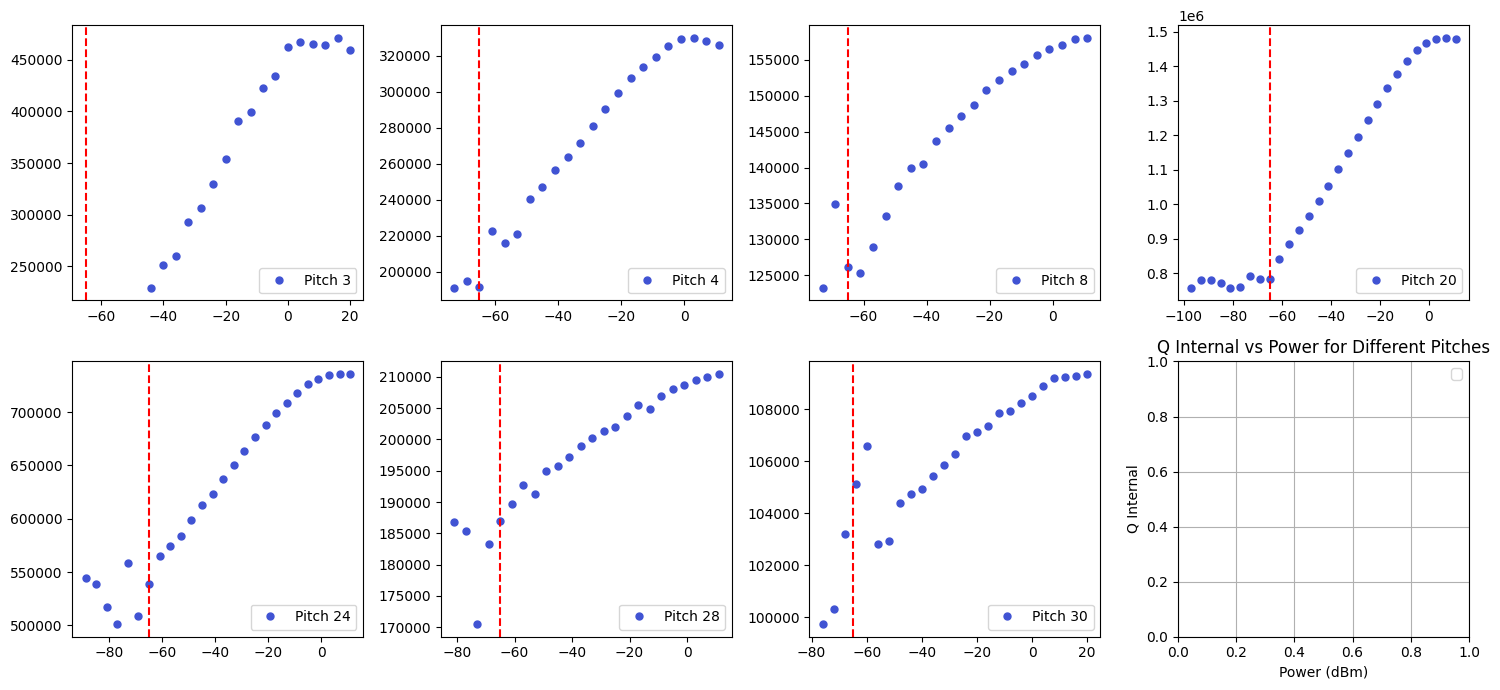

In [75]:
fig, ax = plt.subplots(2, 4, figsize=(15, 7))
ax = ax.flatten()
i=0
for pitch, subset in df_full.groupby('pitch'):
    ax[i].plot(subset['power_dBm'], subset['q_internal'], '.', label=f'Pitch {pitch}')
    ind_closest = (subset['power_dBm'] - (-65)).abs().idxmin()
    print(subset['photon_number'][ind_closest])
    #ax[i].axvline(x=subset.loc[ind_closest, 'power_dBm'], color='g', linestyle='--')
    ax[i].axvline(x=-65, color='r', linestyle='--')
    
    ax[i].legend()
    i+= 1
plt.xlabel('Power (dBm)')
plt.ylabel('Q Internal')
plt.legend()
plt.title('Q Internal vs Power for Different Pitches')
plt.grid(True)
fig.tight_layout()

In [84]:
df_30 = df_full[df_full['pitch'] == 30].sort_values(by='power_at_device_dBm')

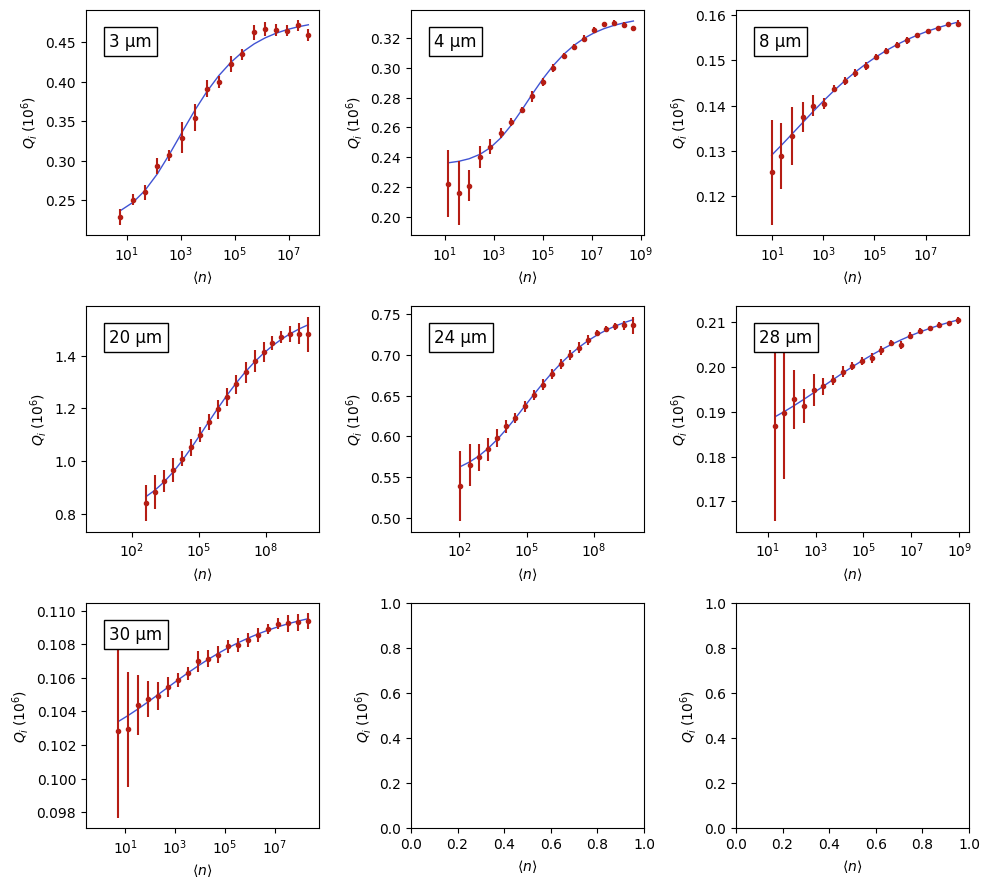

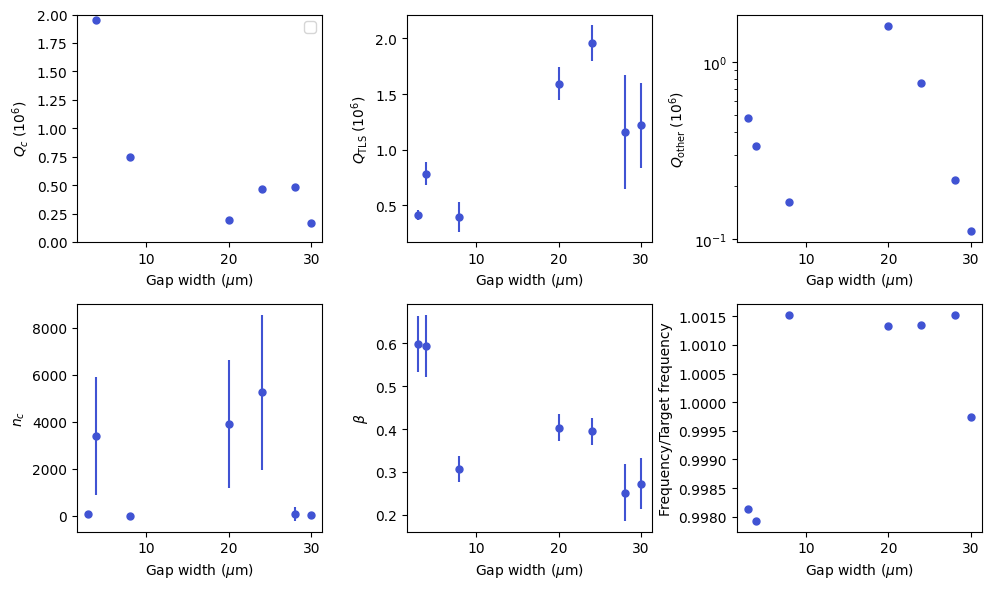

In [77]:
#max_photon = [4e7, 4e7, 1e10, 3e8, 0.8e8, 1e8, 5e8]
#min_photon = [0.1, 1,1, 1,1,1,1]
min_photon = [5, 5, 5, 170, 100, 20, 5]
#params = ana_tls.fit_qi2(df_full, img_pth, name=img_name)#, max_photon_vec=max_photon, min_photon_vec=min_photon) 
params = ana_tls.fit_qi2(df_full, img_pth, name=img_name, min_photon_vec=min_photon) 
ana_tls.plot_res_pars([params], [''],img_pth, name=img_name)

In [50]:
params

{'qtls0': array([1434216.42691295, 1714879.89686666, 1200049.49504115,
         922650.06930585,  474618.37658378, 1274463.35363888,
         414470.04336484]),
 'qother': array([1612094.37325929,  766083.97602824,  215337.83888934,
         333852.41986795,  162167.64489128,  110555.15628512,
         480932.11485243]),
 'nc': array([1738.82333547, 1833.78232172,   95.43011533, 8361.63552041,
          11.07424747,   32.00929223,   51.03140612]),
 'beta': array([0.37891931, 0.35968305, 0.2562206 , 0.66742537, 0.32052246,
        0.28001661, 0.5976711 ]),
 'qtls0_err': array([129331.43789626, 117565.44934951, 564229.63555364, 100973.7661393 ,
        127771.09014016, 394406.2847545 ,  46320.38410897]),
 'qother_err': array([23609.26554899,  4903.14352381,  2338.67308333,  2274.24925729,
          749.14922203,   491.72187264,  6582.66811894]),
 'nc_err': array([1260.3417594 , 1041.89648462,  476.12117209, 5107.87113231,
          25.21468447,   96.5038131 ,   37.50846739]),
 'beta_err'

In [95]:
params

{'qtls0': array([1002582.44128877, 1492518.85186365, 1329272.75842573,
        1218818.9605152 ,  371351.25138689,  617648.90745362,
        1144759.20471853,  264715.8487723 ]),
 'qother': array([2567977.26793277, 2781494.00806767, 3096015.0514271 ,
        1954292.31830315,  721049.04498463, 1275184.33003523,
        2634188.814374  ,  467484.67473592]),
 'nc': array([ 51.16400065, 182.76182671,  27.18233763,   4.4270775 ,
          5.57966194,  13.92671117,  12.15130245,   1.46060984]),
 'beta': array([0.36212715, 0.35520312, 0.3078623 , 0.29808868, 0.43459162,
        0.37209068, 0.33685123, 0.43555541]),
 'qtls0_err': array([127189.13439897,  75749.78858254,  81530.43654018,  85133.77909347,
         50396.37876518,  41495.4094601 ,  56386.00716379,  54461.74067467]),
 'qother_err': array([71526.74443179, 55580.71938226, 84848.19334756, 31260.11092485,
        17375.89727621, 36710.00067759, 55239.1797255 , 15506.42791656]),
 'nc_err': array([51.57995698, 75.91089059, 15.57862809,

In [78]:
hy.save_np(params, img_pth+'Text/' +cfg['pth'][ind][0:-1] +cfg['meas'][ind] + '.yml')